Advanced Data Science Capstone - Week 1 - Data Understanding¶
This will be the first of a series of notebooks about the Advanced Data Science Capstone project. I have chosen the dataset Twitter US Airline Sentiment, that can be found here: https://www.kaggle.com/crowdflower/twitter-airline-sentiment.

As quoted from the original source: "A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service")."

Therefore, as we can see, we have a sentiment analysis problem, that is, we will try to predict from a tweet its customer's sentiment, in other words, we will try to infer a customer's perspective for a specific service.

We have 14.500 tweets, and 15 columns and it contains whether the sentiment of the tweets in this set was positive, neutral, or negative for six US airlines[Source: Kaggle].

This notebook is classified as Data Understanding, our first step in a Data Science project (Actually, the first would be collecting data, however, as this was already done, we skip it here), that is, understanding our data and defining our goals. Thus, here we will work with visualizations about data, giving some basic statistics as well as trying to understand better our features, as they are not given directly by the data source.

So, let's have fun!

In [96]:
# Reading data
import pandas as pd
data = pd.read_csv (r"C:\Users\nisaurab\OneDrive - Capgemini\Downloads\DataScience\Capstone_Project_2\All Data\Tweets.csv")
# checking its dimensions
data.shape

(14640, 15)

In [97]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [98]:
# let's have a look in the number of features missing in our data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

As we can see, for features airline_sentiment_gold and negativereason_gold I have onyl a handful of values, let's what they represent


In [99]:
data[data.airline_sentiment_gold.notnull()].head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1286,569851578276048896,negative,1.0000,Late Flight,0.7684,United,negative,MrEschatologist,Late Flight\nFlight Attendant Complaints,0,"@united I'm aware of the flight details, thank...",NaN,2015-02-23 05:29:38 -0800,"Arlington, VA",NaN
2017,569473998519578624,negative,1.0000,Late Flight,0.6048,United,negative,traceyabbywhite,Late Flight\nLost Luggage,0,@united flighted delayed for hours. 10pm arriv...,NaN,2015-02-22 04:29:16 -0800,"Atlantic Highlands, NJ",Eastern Time (US & Canada)
2135,569343661063823360,neutral,1.0000,NaN,NaN,United,neutral,aushianya,NaN,0,@united I have a question,NaN,2015-02-21 19:51:21 -0800,NaN,NaN
2201,569318505755103232,negative,1.0000,Late Flight,0.6478,United,negative,tarlonious,Late Flight,1,@united it's been over 3 hours...at what point...,NaN,2015-02-21 18:11:23 -0800,NaN,NaN
2383,569235954789015552,negative,0.9286,Customer Service Issue,0.9286,United,negative,screamingbrat,Customer Service Issue,0,@united You shouldn't page o'head that it's be...,NaN,2015-02-21 12:43:22 -0800,"new york, baby",Eastern Time (US & Canada)


In [100]:
data[data.negativereason_gold.notnull()].head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1286,569851578276048896,negative,1.0000,Late Flight,0.7684,United,negative,MrEschatologist,Late Flight\nFlight Attendant Complaints,0,"@united I'm aware of the flight details, thank...",NaN,2015-02-23 05:29:38 -0800,"Arlington, VA",NaN
2017,569473998519578624,negative,1.0000,Late Flight,0.6048,United,negative,traceyabbywhite,Late Flight\nLost Luggage,0,@united flighted delayed for hours. 10pm arriv...,NaN,2015-02-22 04:29:16 -0800,"Atlantic Highlands, NJ",Eastern Time (US & Canada)
2201,569318505755103232,negative,1.0000,Late Flight,0.6478,United,negative,tarlonious,Late Flight,1,@united it's been over 3 hours...at what point...,NaN,2015-02-21 18:11:23 -0800,NaN,NaN
2383,569235954789015552,negative,0.9286,Customer Service Issue,0.9286,United,negative,screamingbrat,Customer Service Issue,0,@united You shouldn't page o'head that it's be...,NaN,2015-02-21 12:43:22 -0800,"new york, baby",Eastern Time (US & Canada)
3005,568802013196242944,negative,1.0000,Can't Tell,0.6870,United,negative,katieclaytonn,Can't Tell,0,@united couldn't have possibly messed up our t...,NaN,2015-02-20 07:59:02 -0800,NaN,Central Time (US & Canada)


By inspection, we see that these values are the same for other columns as airline_sentiment and negativereason, 
then we will drop them without information loss. Also, tweet_coord represents the coordinate of the tweet, 
as we have a lot of null values and with the features tweet_location, we will drop it as well.

Also I find 194 enteries where I have the tweet cord but tweet location is null. If I didnt had a lot of data to work on I could have used this info to populate the location field before dropping tweet_coord column



In [101]:

data[data.tweet_coord.notnull() & data.tweet_location.isnull()].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 21 to 14624
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      194 non-null    int64  
 1   airline_sentiment             194 non-null    object 
 2   airline_sentiment_confidence  194 non-null    float64
 3   negativereason                136 non-null    object 
 4   negativereason_confidence     148 non-null    float64
 5   airline                       194 non-null    object 
 6   airline_sentiment_gold        1 non-null      object 
 7   name                          194 non-null    object 
 8   negativereason_gold           1 non-null      object 
 9   retweet_count                 194 non-null    int64  
 10  text                          194 non-null    object 
 11  tweet_coord                   194 non-null    object 
 12  tweet_created                 194 non-null    object 
 13  tw

In [102]:
data = data.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis = 1)
data.shape

(14640, 12)

Now, we also have null values for the following features: negativereason, negativereason_confidence, tweet_location, user_timezone. Let's dig deeper into it.

In [103]:
data[data.negativereason.isnull()].head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)


It seems negativereason is null whenever we have airline sentiment as neutral or positive. Lets confirm that with below 

In [104]:
data[data.negativereason.isnull()].airline_sentiment.count() 

5462

In [105]:
data[data.negativereason.isnull() & data.airline_sentiment.isin(['neutral','positive'])].airline_sentiment.count()

5462

Similarly negativereason_confidence column, then it will be just the 0 for all these cases.

One important point that I note here is features like negativereason, I may be using it for some vizualization purposes, but this may not be a feature for my sentiment analysis model creation. The reason why think so is because my model would be made to analyze real time tweets, and the same wont have this feature in real enviroment. What we will have is the tweet text and its features like locationa and timezone.

Now lets do some vizualizations:

Text(0.5, 1.0, 'Sentiment Distribution per Airline Company')

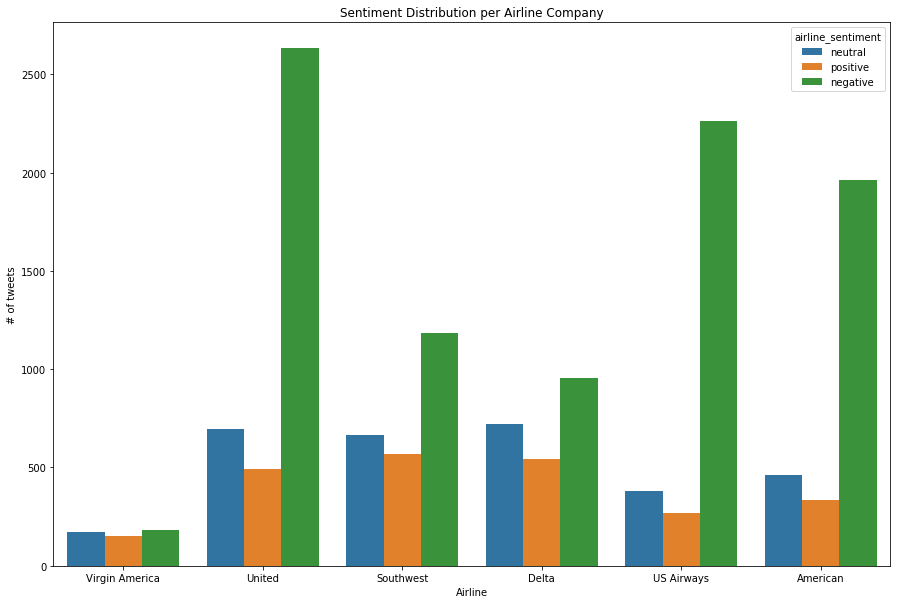

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x="airline", hue="airline_sentiment", data=data)
ax.set_xlabel('Airline')
ax.set_ylabel('# of tweets')
ax.set_title('Sentiment Distribution per Airline Company')

#### Exploratory data analysis 1: 

Frome above We clearly can see "United" seems to have worst negative feedbacks and "Virgin America" is best at same. 

In other words seems proportion of Positive/Negative/Neutral feedbacks varies with Airlines company. But is that true.Lets do a statistical test to find the same.

#### Below would be my NULL Hypothesis which I would try to prove wrong:

###### NULL Hypothesis 1: 
Proportion of Positive/Negative/Neutral feedbacks doesn't varies with Airlines company

In [107]:
from scipy import stats
from statsmodels.stats import weightstats as stests
table = pd.crosstab(data.airline,data['airline_sentiment'])
#Observed Values
Observed_Values = table.values
print("Observed Values :-\n",table)

Observed Values :-
 airline_sentiment  negative  neutral  positive
airline                                       
American               1960      463       336
Delta                   955      723       544
Southwest              1186      664       570
US Airways             2263      381       269
United                 2633      697       492
Virgin America          181      171       152


In [108]:
# Since we are comparing 2 categorical values. I will go for CHI SQUARED Test

chi_square_statistic, p, ddof, Expected_Values =stats.chi2_contingency(table)
#Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
print("Degree of Freedom:-",ddof)

Expected Values :-
 [[1729.65177596  584.02602459  445.32219945]
 [1392.99972678  470.35368852  358.6465847 ]
 [1517.1284153   512.26639344  390.60519126]
 [1826.19631148  616.62479508  470.17889344]
 [2396.05983607  809.04221311  616.89795082]
 [ 315.96393443  106.68688525   81.34918033]]
Degree of Freedom:- 10


In [109]:
alpha = 0.05
critical_value=stats.chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
print('p-value:',p)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('critical_value:',critical_value)

critical_value: 18.307038053275146
p-value: 1.1843123973768729e-241
Significance level:  0.05
Degree of Freedom:  10
critical_value: 18.307038053275146


In [110]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between Airlines Company and prportion of feedbacks")
else:
    print("Retain H0,There is no relationship between Airlines Company and prportion of feedbacks")
    
if p<=alpha:
     print("Reject H0,There is a relationship between Airlines Company and prportion of feedbacks")
else:
    print("Retain H0,There is no relationship between Airlines Company and prportion of feedbacks")

Reject H0,There is a relationship between Airlines Company and prportion of feedbacks
Reject H0,There is a relationship between Airlines Company and prportion of feedbacks


In [111]:
data.airline_sentiment.value_counts(normalize=True)

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

Text(0, 0.5, '# of tweets')

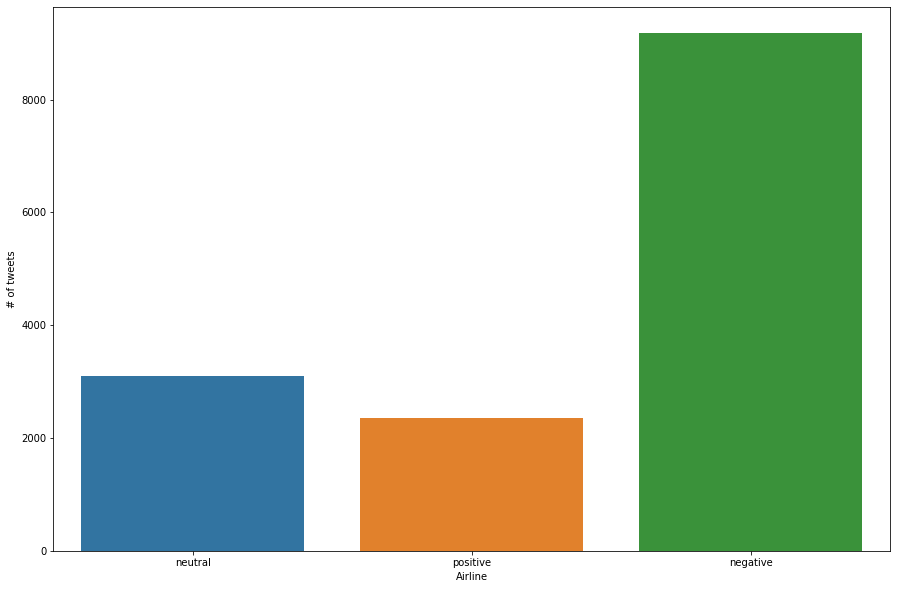

In [112]:
f, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x="airline_sentiment", data=data)
ax.set_xlabel('Airline')
ax.set_ylabel('# of tweets')

#### Exploratory data analysis 2: 
Also overall US flights are not so good with customer service considering 60 % of tweets were negative. We can also account one important fact around human behavior of people using social media more often to vent out there anger for a bad service compared to negative or postive service. Lets see if we validate this finding with a Hypothesis testing.

Now lets analyze the data from time zone prospective

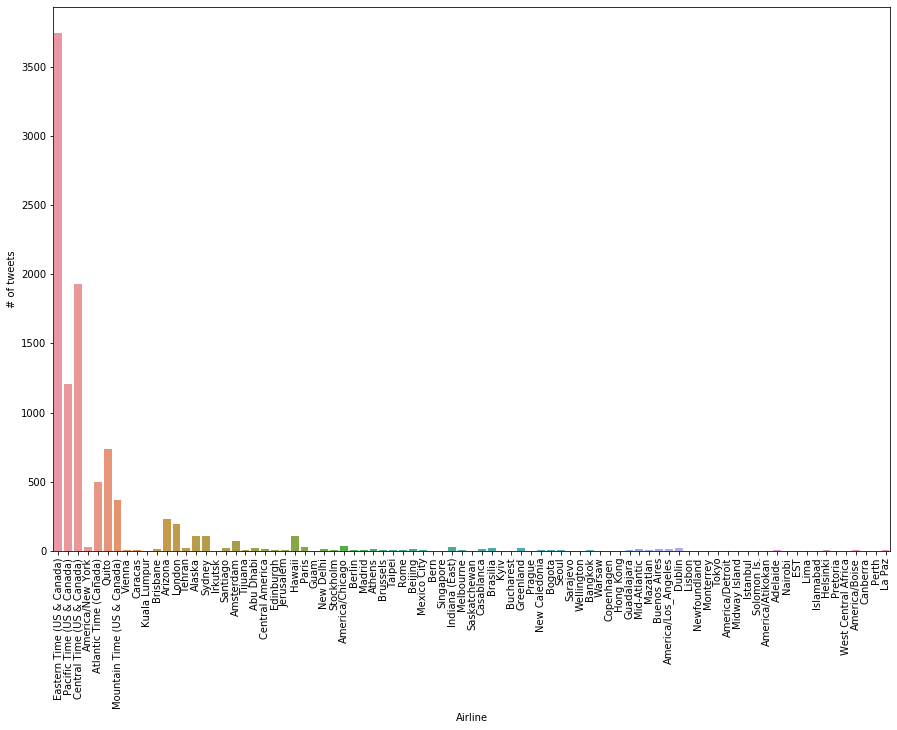

In [113]:
f, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x="user_timezone", data=data)
ax.set_xlabel('Airline')
ax.set_ylabel('# of tweets')
label=ax.get_xticklabels()
ax.set_xticklabels(label,rotation=90);

Lets now visualize how tweets sentiments are devided based on top 3 time zones 

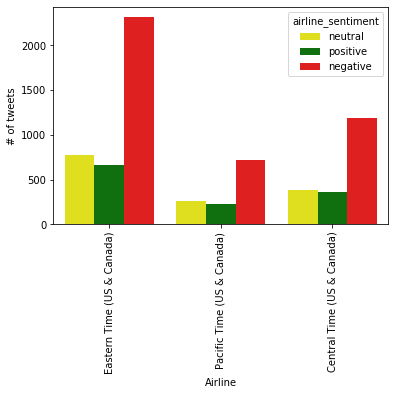

In [114]:
tz=data.user_timezone.value_counts().index[0:3]
palette_colors = {"neutral": "yellow", "positive": "green", "negative": "red"}
ax = sns.countplot(x="user_timezone", hue='airline_sentiment',data=data[data.user_timezone.isin(tz)],palette=palette_colors)
ax.set_xlabel('Airline')
ax.set_ylabel('# of tweets')
label=ax.get_xticklabels()
ax.set_xticklabels(label,rotation=90);

Lets now visualize how tweets sentiments are devided based on top 7 time zones 

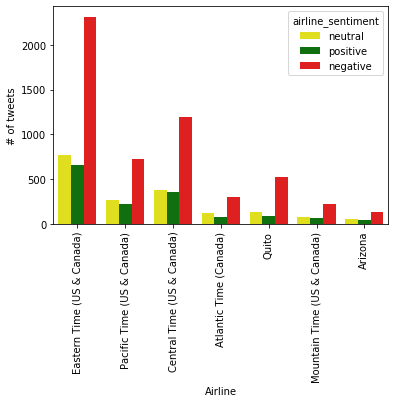

In [115]:
tz=data.user_timezone.value_counts().index[0:7]
palette_colors = {"neutral": "yellow", "positive": "green", "negative": "red"}
ax = sns.countplot(x="user_timezone", hue='airline_sentiment',data=data[data.user_timezone.isin(tz)],palette=palette_colors)
ax.set_xlabel('Airline')
ax.set_ylabel('# of tweets')
label=ax.get_xticklabels()
ax.set_xticklabels(label,rotation=90);

### Exploratory data analysis 3: 

We can clearly notice the timezones do not impact a lot on sentiment distribution. Something which I was not expecting. This would be basis for my next Hypothesis testing.

Also to get a better understanding I will stick with US time Zones first and the overall also.

#### NULL Hypothesis 2:

Proportion of my different feedbacks do not change with US time Zones


In [116]:
Time_zone = data.user_timezone.value_counts().index[0:6].values
data_tz = data[data.user_timezone.isin(Time_zone)][data.user_timezone.str.contains('Quito')==0]
data_tz.airline.value_counts()


C:\Users\nisaurab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


United            2006
US Airways        1436
Southwest         1395
American          1335
Delta             1259
Virgin America     318
Name: airline, dtype: int64

In [117]:

table = pd.crosstab(data_tz.user_timezone,data_tz['airline_sentiment'])
#Observed Values
Observed_Values = table.values
print("Observed Values :-\n",table)

Observed Values :-
 airline_sentiment            negative  neutral  positive
user_timezone                                           
Atlantic Time (Canada)            299      120        78
Central Time (US & Canada)       1191      383       357
Eastern Time (US & Canada)       2313      769       662
Mountain Time (US & Canada)       226       76        67
Pacific Time (US & Canada)        720      264       224


In [118]:
# Since we are comparing 2 categorical values. I will go for CHI SQUARED Test

chi_square_statistic, p, ddof, Expected_Values =stats.chi2_contingency(table)
#Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
print("Degree of Freedom:-",ddof)

Expected Values :-
 [[ 304.58807588  103.38934056   89.02258356]
 [1183.41966705  401.69983224  345.88050071]
 [2294.52264808  778.8524971   670.62485482]
 [ 226.14285714   76.76190476   66.0952381 ]
 [ 740.32675184  251.29642535  216.37682282]]
Degree of Freedom:- 8


In [119]:
stats.chi2_contingency?

In [120]:
alpha = 0.05
critical_value=stats.chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
print('p-value:',p)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('critical_value:',critical_value)

critical_value: 15.50731305586545
p-value: 0.5061345669137645
Significance level:  0.05
Degree of Freedom:  8
critical_value: 15.50731305586545


In [121]:
if chi_square_statistic>=critical_value:
    print("Reject H2,There is a relationship between US TimeZone and prportion of feedbacks")
else:
    print("Retain H2,There is no relationship between US TimeZone and prportion of feedbacks")
    
if p<=alpha:
     print("Reject H2,There is a relationship between US TimeZone and prportion of feedbacks")
else:
    print("Retain H2,There is no relationship between US TimeZone and prportion of feedbacks")

Retain H2,There is no relationship between US TimeZone and prportion of feedbacks
Retain H2,There is no relationship between US TimeZone and prportion of feedbacks


#### NULL Hypothesis 3 :

Proportion of my different feedbacks do not change with Any time Zones

In [122]:

table = pd.crosstab(data.user_timezone,data['airline_sentiment'])
#Observed Values
Observed_Values = table.values
print("Observed Values :-\n",table)

Observed Values :-
 airline_sentiment    negative  neutral  positive
user_timezone                                   
Abu Dhabi                   0       13        10
Adelaide                    2        3         2
Alaska                     73       18        17
America/Atikokan            1        0         0
America/Boise               3        0         0
...                       ...      ...       ...
Tokyo                       0        1         0
Vienna                      1        1         1
Warsaw                      0        1         0
Wellington                  0        1         0
West Central Africa         1        0         0

[85 rows x 3 columns]


In [123]:
# Since we are comparing 2 categorical values. I will go for CHI SQUARED Test

chi_square_statistic, p, ddof, Expected_Values =stats.chi2_contingency(table)
#Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
print("Degree of Freedom:-",ddof)

Expected Values :-
 [[1.40716904e+01 4.98411405e+00 3.94419552e+00]
 [4.28268839e+00 1.51690428e+00 1.20040733e+00]
 [6.60757637e+01 2.34036660e+01 1.85205703e+01]
 [6.11812627e-01 2.16700611e-01 1.71486762e-01]
 [1.83543788e+00 6.50101833e-01 5.14460285e-01]
 [2.26370672e+01 8.01792261e+00 6.34501018e+00]
 [6.11812627e-01 2.16700611e-01 1.71486762e-01]
 [9.17718941e+00 3.25050916e+00 2.57230143e+00]
 [1.59071283e+01 5.63421589e+00 4.45865580e+00]
 [4.52741344e+01 1.60358452e+01 1.26900204e+01]
 [1.40105092e+02 4.96244399e+01 3.92704684e+01]
 [9.78900204e+00 3.46720978e+00 2.74378819e+00]
 [3.04070876e+02 1.07700204e+02 8.52289206e+01]
 [2.44725051e+00 8.66802444e-01 6.85947047e-01]
 [6.72993890e+00 2.38370672e+00 1.88635438e+00]
 [5.50631365e+00 1.95030550e+00 1.54338086e+00]
 [6.11812627e-01 2.16700611e-01 1.71486762e-01]
 [3.05906314e+00 1.08350305e+00 8.57433809e-01]
 [1.40716904e+01 4.98411405e+00 3.94419552e+00]
 [6.11812627e+00 2.16700611e+00 1.71486762e+00]
 [5.50631365e+00 1.9

In [124]:
alpha = 0.05
critical_value=stats.chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
print('p-value:',p)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('critical_value:',critical_value)


critical_value: 199.2441769293174
p-value: 1.1348958792602684e-33
Significance level:  0.05
Degree of Freedom:  168
critical_value: 199.2441769293174


In [125]:
if chi_square_statistic>=critical_value:
    print("Reject H3,There is a relationship between TimeZone and prportion of feedbacks")
else:
    print("Retain H3,There is no relationship between TimeZone and prportion of feedbacks")
    
if p<=alpha:
     print("Reject H3,There is a relationship between TimeZone and prportion of feedbacks")
else:
    print("Retain H3,There is no relationship between TimeZone and prportion of feedbacks")

Reject H3,There is a relationship between TimeZone and prportion of feedbacks
Reject H3,There is a relationship between TimeZone and prportion of feedbacks


### Interesting findings 

Seems When we compare just the Tweets in US time zone we do not find any depedency between tweet proportions but when we consider all thet time zones there is a relationship between TimeZone and prportion of feedbacks

###  Now lets do some Bag of words exercise to find out how the same looks for both positive and negative sentiment tweets

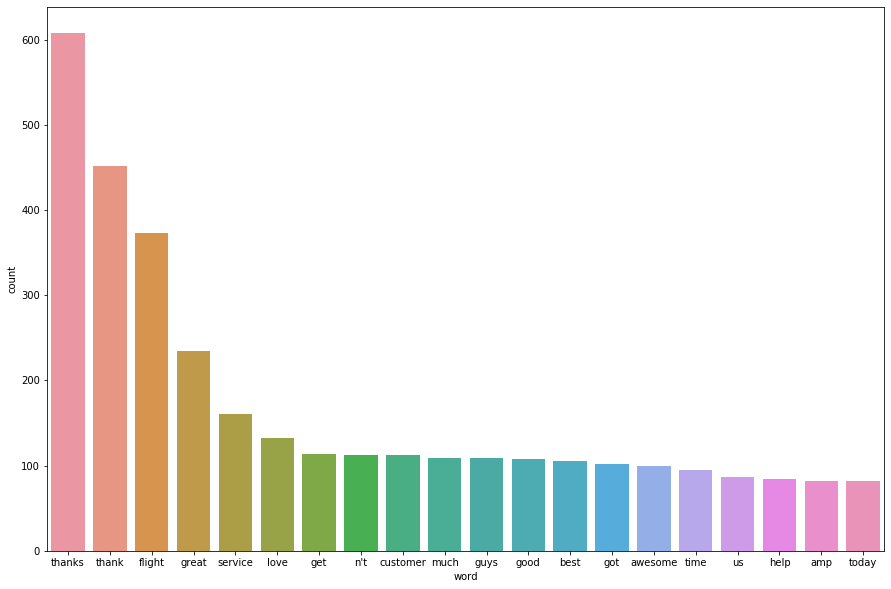

In [126]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
import nltk
from collections import Counter

## Positive Tweets
pos_tweets = data[data.airline_sentiment=='positive']['text'].values
## Negative tweets
neg_tweets = data[data.airline_sentiment=='negative']['text'].values
#define filter words
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['jetblue', 'southwestair','united','americanair','usairways','http','virginamerica','\'s','...']
#seperate out the words from the tweets
pos_tweets_tok = [w.lower() for tweet in pos_tweets for w in word_tokenize(tweet) if w.lower() not in stop ]
neg_tweets_tok = [w for tweet in neg_tweets for w in word_tokenize(tweet) if w.lower() not in stop]
#Lets see the Positive Tweets first
count_terms = Counter(pos_tweets_tok)
pos_tweets_cnt = pd.DataFrame (count_terms.most_common(20), columns = ['word','count'])
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(pos_tweets_cnt['word'],pos_tweets_cnt['count'] )

##### As expected, in positive reviews we have the word thank appearing more times than the others ones. Let's do the same for negative reviews.

In [127]:
from gensim import corpora, models
from gensim.similarities import MatrixSimilarity
from gensim.utils import SaveLoad
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from re import sub
import pyLDAvis.gensim
from collections import Counter
from gensim.matutils import corpus2csc, sparse2full, corpus2dense
from sklearn.utils import resample

In [128]:
#Functions for data cleaning
wnl = WordNetLemmatizer()

def removePunc(myWord):
    """Function to remove punctuation from string inputs"""
    if myWord is None:
        return myWord
    else:
        return sub('[.:;()/!&-*@$,?^\d+]','',myWord)
        
def removeAscii(myWord):
    """Function to remove ascii from string input"""
    if myWord is None:
        return myWord
    else:
        return str(sub(r'[^\x00-\x7F]+','', myWord.strip()))

def lemmatize(myWord):
    """Function to lemmatize words"""
    if myWord is None:
        return myWord
    else:
        return str(wnl.lemmatize(myWord))

def removeStopWords(myWord):
    """Function to remove stop words"""
    if myWord is None:
        return myWord
    if myWord not in str(stopwords.words('english')):
        return myWord

def removeLinkUser(myWord):
    """Function to remove web addresses and twitter handles"""
    if not myWord.startswith('@') and not myWord.startswith('http'):
        return myWord

def prepText(myWord):
    """Final text pre-processing function"""
    return removeStopWords(
        lemmatize(
            removeAscii(
                removePunc(
                    removeLinkUser(
                        myWord.lower()
                    )
                )
            )
        )
    )

<>:9: DeprecationWarning: invalid escape sequence \d
<>:9: DeprecationWarning: invalid escape sequence \d
<>:9: DeprecationWarning: invalid escape sequence \d
<ipython-input-128-6217259fa9ee>:9: DeprecationWarning: invalid escape sequence \d
  return sub('[.:;()/!&-*@$,?^\d+]','',myWord)


In [129]:
def filterTweetList(tweetList):
    """Remove stop words, lemmatize, and clean all tweets"""
    return [[prepText(word) for word
                in tweet.split()
                    if prepText(word) is not None]
                for tweet in tweetList]

In [130]:
cleanTweetList = filterTweetList(data[data.airline_sentiment=='positive']['text'])

In [131]:
def makeDict(myTweetList):
    """Create dictionary from list of tokenized documents"""
    return corpora.Dictionary(myTweetList)

def makeCorpus(myTweetList,myDict):
    """Create corpus from list of tokenized documents"""
    return [myDict.doc2bow(tweet) for tweet in myTweetList]

def createLDA(myCorpus, myDictionary,myTopics=15,myPasses=10,myIterations=50,myAlpha=0.001):
    """LDA model call function"""
    return models.LdaMulticore(myCorpus, id2word=myDictionary, num_topics=myTopics, passes=myPasses,
    iterations=myIterations,alpha=myAlpha)

In [132]:
#"""Create model objects"""
posDict   = makeDict(cleanTweetList)
posCorpus = makeCorpus(cleanTweetList, posDict)
posLda = createLDA(posCorpus, posDict)
createLDA?

In [133]:
createLDA?

In [134]:
pyLDAvis.enable_notebook()
ldaViz = pyLDAvis.gensim.prepare(posLda, posCorpus, posDict)

In [135]:
ldaViz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.094644  0.069074       1        1  10.298455
13    -0.144507 -0.000222       2        1   9.789518
2     -0.027181  0.038239       3        1   8.946330
0     -0.097122  0.051361       4        1   7.890408
6      0.097089  0.037063       5        1   7.549289
5      0.050813  0.017870       6        1   6.958067
4     -0.004016 -0.035066       7        1   6.594180
10     0.041557 -0.059125       8        1   6.319176
12     0.006837 -0.104093       9        1   5.921833
7     -0.025011 -0.125321      10        1   5.704559
11     0.039064 -0.031212      11        1   5.313374
14     0.013336  0.014564      12        1   5.280895
3      0.003882 -0.006624      13        1   4.629537
1      0.077605  0.042767      14        1   4.470561
9      0.062298  0.090723      15        1   4.333825, topic_info=         Term        Freq       Total Category  logprob  loglift
183     thank  387.000000  387.000000  Default  30.0000  30.0000
150  customer  103.000000  103.000000  Default  29.0000  29.0000
50     thanks  508.000000  508.000000  Default  28.0000  28.0000
152   service  133.000000  133.000000  Default  27.0000  27.0000
246    follow   28.000000   28.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
472      look    2.877075   28.242516  Topic15  -5.5317   0.8547
595     agent    3.024537   41.162384  Topic15  -5.4817   0.5280
89    airline    3.303139   83.671471  Topic15  -5.3936  -0.0933
183     thank    3.717772  387.645905  Topic15  -5.2754  -1.5082
393       day    2.926465   51.236706  Topic15  -5.5147   0.2761

[1165 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
608       8  0.742883   "airport
2801     15  0.644902  "breaking
1622     14  0.644634      "fine
1323      1  0.063069          #
1323      3  0.283810          #
...     ...       ...        ...
5        14  0.378805      youve
3504      8  0.825411     youyou
459       1  0.601290         yr
459       8  0.200430         yr
459      14  0.200430         yr

[2818 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 14, 3, 1, 7, 6, 5, 11, 13, 8, 12, 15, 4, 2, 10])

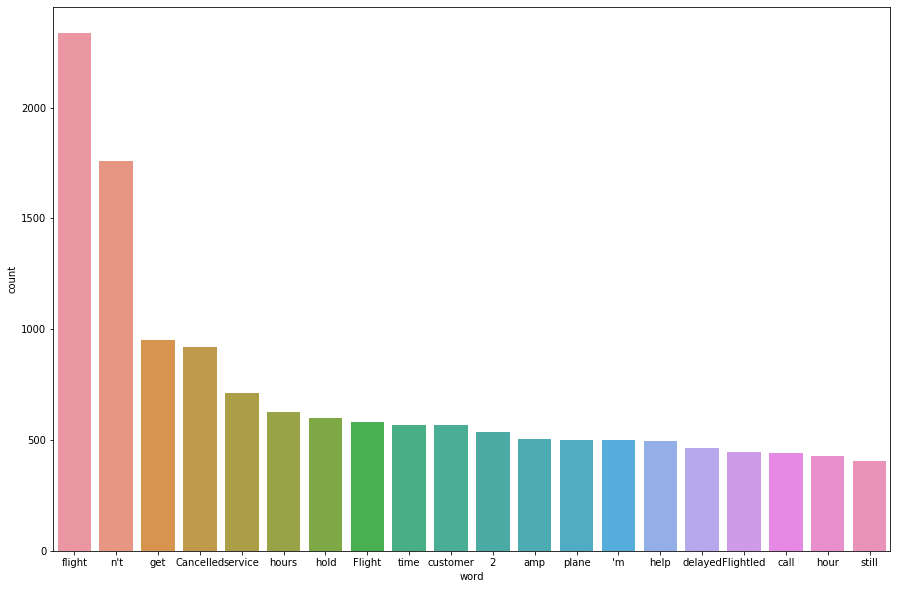

In [136]:
count_terms = Counter(neg_tweets_tok)
ng_tweets_cnt = pd.DataFrame (count_terms.most_common(20), columns = ['word','count'])
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(ng_tweets_cnt['word'],ng_tweets_cnt['count'] )


##### Here, we have flights as the first most common word. The reason could be that negative tweets are complainings about something that happened during a flight time, indicating that a operational problem. Also we notice words like "Canceled", " Servive", "Hours"."Hold" and "Time" which points to either a bad service or flights getting delayed/cancelled or combination of both.



### With Above bag of words analysis I will be ending my exporatory data analysis and move on to feature engineering section now on move on to Feature engineering

#### Text Preprocessed feature
Lets now create a feature with original texts being Preprocessed 

In [137]:
#Before I start, I will have dataset only limit to US time Zones:
tz = ['Eastern Time (US & Canada)','Central Time (US & Canada)','Pacific Time (US & Canada)','Mountain Time (US & Canada)']
data = data[data.user_timezone.isin(tz)]
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [138]:

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string

# function to help us developing features such as lower_case, punctuation (keep or strip),
# delete stop_words, etc.
def preprocess(tweet,punctuation=False, join=True,preserve_case= False,strip_handles=False, reduce_len=False, emo=False ):
    
    #define filter words
    punctuation = [] if punctuation else list(string.punctuation)
    positive_emoticons = {':-)':'happy', ':)':'happy', '=)':'happy', ':D':'happy', ';D':'happy', ':]':'happy', ';]':'happy', ':-D':'happy'}
    negative_emoticons = {':-(':'sad', ':(':'sad', '=(':'sad', ';(':'sad', 'D:':'sad', 'D;':'sad', ':[':'sad', ';[':'sad', ':/':'sad'}
    qex_emoticons = {'?':'question', '!':'exclamation'}
    emoticons = {**positive_emoticons,**negative_emoticons,**qex_emoticons }
    stop = stopwords.words('english') + punctuation + ['jetblue', 'southwestair','united','americanair','usairways','http','virginamerica','\'s','...']

    tknzr = TweetTokenizer(preserve_case=preserve_case, 
                           strip_handles=strip_handles, reduce_len=reduce_len)
    
    tokens = tknzr.tokenize(tweet)
    
    tokens = [token for token in tokens
              if token not in stop and
              not token.startswith(('#', '@','http', '...'))] 
    
    if join and emo:
        tokens=' '.join(tokens)
        for key in emoticons.keys():
            tokens=tokens.replace(key, emoticons[key])
        return tokens
    elif join:
        return ' '.join(tokens)
    
    return tokens

In [139]:
data['text_preprocessed'] = data.text.apply(lambda x: preprocess(x, preserve_case=True, punctuation=False))
data.tail(4)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,text_preprocessed
14629,569588591602458624,negative,1.000,Customer Service Issue,1.0000,American,jontgreen89,0,@AmericanAir How do I change my flight if the ...,2015-02-22 12:04:37 -0800,"Waco, TX",Central Time (US & Canada),How I change flight phone system keeps telling...
14631,569588464896876545,negative,1.000,Bad Flight,1.0000,American,MDDavis7,0,@AmericanAir thx for nothing on getting us out...,2015-02-22 12:04:07 -0800,US,Eastern Time (US & Canada),thx nothing getting us country back US Broken ...
14632,569587813856841728,neutral,0.676,NaN,0.0000,American,Chad_SMFYM,0,"“@AmericanAir: @TilleyMonsta George, that does...",2015-02-22 12:01:31 -0800,NaN,Central Time (US & Canada),“ George look good Please follow link start re...
14638,569587188687634433,negative,1.000,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),money change flight answer phones Any suggesti...


#### Sentiment Scores Features
Now, I will use the library defined on nltk module called vader that contains a lexicon of positive, neutral and negative words. Here, I want to create features based on the polarity scores of our tweets, i.e., I will pass each tweet to the function polarity_scores, and it will returns values for negative, neutral, positive and compound. Then, they will be used as extra features to our classification task.

In [140]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def polarity_scores(tweets):
    neg, neu, pos, compound = [], [], [], []
    analyser = SentimentIntensityAnalyzer()

    for tweet in tweets:
        score = analyser.polarity_scores(tweet)
        neg.append(score['neg'])
        neu.append(score['neu'])
        pos.append(score['pos'])
        compound.append(score['compound'])
    
    return neg, neu, pos, compound

all_scores = polarity_scores(data.text_preprocessed.values)
data['neg_scores'] = all_scores[0]
data['neu_scores'] = all_scores[1]
data['pos_scores'] = all_scores[2]
data['compound_scores'] = all_scores[3]

In [141]:
data.tail(4)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,text_preprocessed,neg_scores,neu_scores,pos_scores,compound_scores
14629,569588591602458624,negative,1.000,Customer Service Issue,1.0000,American,jontgreen89,0,@AmericanAir How do I change my flight if the ...,2015-02-22 12:04:37 -0800,"Waco, TX",Central Time (US & Canada),How I change flight phone system keeps telling...,0.000,1.000,0.000,0.0000
14631,569588464896876545,negative,1.000,Bad Flight,1.0000,American,MDDavis7,0,@AmericanAir thx for nothing on getting us out...,2015-02-22 12:04:07 -0800,US,Eastern Time (US & Canada),thx nothing getting us country back US Broken ...,0.187,0.663,0.151,-0.1531
14632,569587813856841728,neutral,0.676,NaN,0.0000,American,Chad_SMFYM,0,"“@AmericanAir: @TilleyMonsta George, that does...",2015-02-22 12:01:31 -0800,NaN,Central Time (US & Canada),“ George look good Please follow link start re...,0.000,0.574,0.426,0.6369
14638,569587188687634433,negative,1.000,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),money change flight answer phones Any suggesti...,0.000,0.755,0.245,0.3818


#### Change emoticons/Questions/Exclamation to words

In [142]:
data['text_preprocessed_with_emoticon'] = data.text.apply(lambda x: preprocess(x, preserve_case=True, punctuation=False,emo=True))

In [143]:
data['text_preprocessed'][8]


'Well I … NOW I DO :-D'

In [144]:
data['text_preprocessed_with_emoticon'][8]

'Well I … NOW I DO happy'

### Stemming
Stemming is another common step in text analysis. Here, I will replace words for its root based on a rule called Porter Stemmer and will be another one of my features:

In [145]:
from nltk.stem.porter import PorterStemmer

def stemming(s):
    stemmer = PorterStemmer()
    tokens = preprocess(s,  join=False)
    x = [stemmer.stem(w) for w in tokens]
    
    return ' '.join(x)

data['text_stemming'] = data.text_preprocessed.apply(lambda x: stemming(x))
data['text_stemming_with_emoticon'] = data.text_preprocessed_with_emoticon.apply(lambda x: stemming(x))

In [146]:
data['text_preprocessed'][8]

'Well I … NOW I DO :-D'

In [147]:
data['text_stemming'][8]

'well … :-d'

In [148]:
data = data.fillna(value=0.0)
data.shape

(7252, 20)

In [149]:
# let's see how the data set is now
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 14638
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tweet_id                         7252 non-null   int64  
 1   airline_sentiment                7252 non-null   object 
 2   airline_sentiment_confidence     7252 non-null   float64
 3   negativereason                   7252 non-null   object 
 4   negativereason_confidence        7252 non-null   float64
 5   airline                          7252 non-null   object 
 6   name                             7252 non-null   object 
 7   retweet_count                    7252 non-null   int64  
 8   text                             7252 non-null   object 
 9   tweet_created                    7252 non-null   object 
 10  tweet_location                   7252 non-null   object 
 11  user_timezone                    7252 non-null   object 
 12  text_preprocessed  

### With this I will now move on to my next part which is creating models.

In [150]:
data.columns
# Lets do one hot encoding for US Time Zones
user_timezone = pd.get_dummies(data.user_timezone, prefix='tz')
data = pd.concat([data,user_timezone], axis = 1)
data.info()
#data = data.drop(data.columns[[20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]], axis=1) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 14638
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tweet_id                         7252 non-null   int64  
 1   airline_sentiment                7252 non-null   object 
 2   airline_sentiment_confidence     7252 non-null   float64
 3   negativereason                   7252 non-null   object 
 4   negativereason_confidence        7252 non-null   float64
 5   airline                          7252 non-null   object 
 6   name                             7252 non-null   object 
 7   retweet_count                    7252 non-null   int64  
 8   text                             7252 non-null   object 
 9   tweet_created                    7252 non-null   object 
 10  tweet_location                   7252 non-null   object 
 11  user_timezone                    7252 non-null   object 
 12  text_preprocessed  

In [151]:
## Lets do one hot encoding for US Airlines now
airline = pd.get_dummies(data.airline, prefix='al')
data = pd.concat([data,airline], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 14638
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tweet_id                         7252 non-null   int64  
 1   airline_sentiment                7252 non-null   object 
 2   airline_sentiment_confidence     7252 non-null   float64
 3   negativereason                   7252 non-null   object 
 4   negativereason_confidence        7252 non-null   float64
 5   airline                          7252 non-null   object 
 6   name                             7252 non-null   object 
 7   retweet_count                    7252 non-null   int64  
 8   text                             7252 non-null   object 
 9   tweet_created                    7252 non-null   object 
 10  tweet_location                   7252 non-null   object 
 11  user_timezone                    7252 non-null   object 
 12  text_preprocessed  

In [152]:
## Seperate out Features and Target Variables

label = ['airline_sentiment']
columns = list(data.select_dtypes('uint8').columns)
features = ['text_stemming', 'neu_scores', 'neg_scores', 'compound_scores', 'pos_scores'] + columns
X = data[[col for col in data.columns if col in features]]
y = data[label]
X.head()

,neg_scores,neu_scores,pos_scores,compound_scores,text_stemming,tz_Central Time (US & Canada),tz_Eastern Time (US & Canada),tz_Mountain Time (US & Canada),tz_Pacific Time (US & Canada),al_American,al_Delta,al_Southwest,al_US Airways,al_United,al_Virgin America
0,0.000,1.000,0.000,0.0000,said,0,1,0,0,0,0,0,0,0,1
1,0.000,1.000,0.000,0.0000,plu ad commerci experi tacki,0,0,0,1,0,0,0,0,0,1
2,0.000,1.000,0.000,0.0000,today must mean need take anoth trip,1,0,0,0,0,0,0,0,0,1
3,0.369,0.430,0.201,-0.3306,realli aggress blast obnoxi entertain guest fa...,0,0,0,1,0,0,0,0,0,1
4,0.557,0.443,0.000,-0.5829,realli big bad thing,0,0,0,1,0,0,0,0,0,1


In [153]:
# train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0,stratify=y)

print("Shapes are {} and {}".format(X_train.shape, X_test.shape))

Shapes are (5076, 15) and (2176, 15)


## Now I will use Mutual Information Library as a curiousity to find out what are my most important Features

In [155]:
Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english" , max_df=0.7)
# Transform the training data: tfidf_train 
X_train['tfidf_train'] = tfidf_vectorizer.fit_transform(X_train['text_stemming'])
# Transform the test data: tfidf_test 
X_test['tfidf_test'] = tfidf_vectorizer.transform(X_test['text_stemming'])


In [156]:
from sklearn.feature_selection import mutual_info_classif
features_n = ['neu_scores', 'neg_scores', 'compound_scores',  'pos_scores'] + columns
X_train[features_n]
mutual_info_classif(X_train[features_n], y_train, discrete_features=True)

C:\Users\nisaurab\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2.49661778e-01, 1.62412343e-01, 2.75504301e-01, 2.95422358e-01,
       1.15220900e-04, 8.31449279e-05, 6.85884810e-06, 1.44539175e-04,
       2.80750567e-03, 1.19601913e-02, 8.34961896e-03, 1.12279304e-02,
       5.50396194e-03, 5.51554268e-03])

In [157]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextSelector(BaseEstimator, TransformerMixin):
    """
    Using inheritance to create my function to return one text column
    """
    def __init__(self, key):
        self.key = key
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
        Using inheritance to create my function to return one numeric column
    """
    def __init__(self, key):
        self.key = key
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[[self.key]]

# Defining Pipelines

## We will test our classifier with two types of text processors, tfidf and countVectorizer.


In [158]:

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer

tfidf = Pipeline([
                ('selector', TextSelector(key='text_stemming')),
                ('tfidf', TfidfVectorizer())
            ])

countvect = Pipeline([
                ('selector', TextSelector(key='text_stemming')),
                ('countvect', CountVectorizer())
            ])

In [159]:
from sklearn.preprocessing import MinMaxScaler

neu_scores =  Pipeline([
                ('selector', NumberSelector(key='neu_scores')),
                ('minmax', MinMaxScaler())
            ])
neg_scores =  Pipeline([
                ('selector', NumberSelector(key='neg_scores')),
                ('minmax', MinMaxScaler())
            ])
pos_scores =  Pipeline([
                ('selector', NumberSelector(key='pos_scores')),
                ('minmax', MinMaxScaler())
            ])

compound_scores =  Pipeline([
                ('selector', NumberSelector(key='compound_scores')),
                ('minmax', MinMaxScaler())
            ])

In [160]:
from sklearn.pipeline import FeatureUnion

# using featureuning to combine horizontly all outputs from dif pipelines
def features_union(textProcessor):
    return FeatureUnion([('text', textProcessor), 
                      ('neu_scores', neu_scores),
                      ('neg_scores', neg_scores),
                      ('pos_scores', pos_scores),
                      ('compound_scores', compound_scores)])

In [161]:
from sklearn.preprocessing import LabelEncoder
## Using labelencoder to change y column to numeric value
le = LabelEncoder().fit(y_train.values.ravel())

y_train = le.transform(y_train.values.ravel())
y_test = le.transform(y_test.values.ravel())

X_train.shape, X_test.shape

((5076, 15), (2176, 15))

In [162]:
list(le.inverse_transform([0, 1, 2]))

['negative', 'neutral', 'positive']

## Now I will give a try to few models without CV, to get a feeling of how they perform

In [163]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
features_count = features_union(countvect)
nb_pipeline = Pipeline([('features', features_count),
                       ('nb', clf)])
nb_pipeline.fit(X_train, y_train)
nb_pipeline.score(X_test, y_test)

0.7545955882352942

In [164]:

features_tfidf = features_union(tfidf)
nb_pipeline = Pipeline([('features', features_tfidf),
                       ('nb', clf)])
nb_pipeline.fit(X_train, y_train)
nb_pipeline.score(X_test, y_test)

0.6760110294117647

In [165]:
from sklearn.svm import LinearSVC

svm = LinearSVC()

features_tfidf = features_union(tfidf)
svm_pipeline = Pipeline([('features', features_tfidf),
                       ('svm', svm)])
svm_pipeline.fit(X_train, y_train)
svm_pipeline.score(X_test, y_test)

0.7743566176470589

In [166]:
from sklearn.svm import LinearSVC

svm = LinearSVC()

features_tfidf = features_union(countvect)
svm_pipeline = Pipeline([('features', features_tfidf),
                       ('svm', svm)])
svm_pipeline.fit(X_train, y_train)
svm_pipeline.score(X_test, y_test)

0.7522977941176471

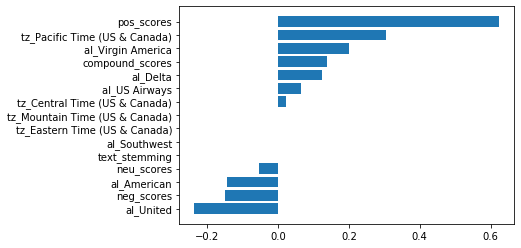

In [175]:
## Lets check feature importance 
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

f_importances(svm.coef_[0], features)

In [168]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100)
rf_pipeline = Pipeline([('features', features_count),
                       ('rf', rf)])

rf_pipeline.fit(X_train, y_train)
rf_pipeline.score(X_test, y_test)

0.7541360294117647

In [169]:
#len(X_train.columns)
#len(rf.feature_importances_)

## Cross-Validation

## Now I will go for Cross Validation for different models. Things I plan to do for each model will be 
    
###        1. Get the Best performing Parameters
###        2. Generate Confusion Matrix
###        3. Generate Classification Report
### Considering this is multiclass classification I will look for Weighted F1 Sore for Model Performance 

In [77]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [89]:
# cross-validation for Naive Bayes Classifier
from sklearn.model_selection import GridSearchCV

features_tfidf = features_union(tfidf)

nb_pipeline = Pipeline([('feats', features_tfidf),  ('clf', MultinomialNB())])
parameters = {
    'feats__text__tfidf__max_df': (0.5, 0.75, 1.0),
    'feats__text__tfidf__ngram_range': ((1, 1), (1, 2), (2, 2)), 
    'feats__text__tfidf__use_idf': (False, True),
    'feats__text__tfidf__binary':(False, True),
    'feats__text__tfidf__binary':('l1', 'l2', None),
   ## 'clf__alpha': (10, 100, 500, 1000), - Best Param 10 - 0.6392463235294118
   ## 'clf__alpha': (1.0, 5.0, 10.0), - Best Param 1 - 0.7545955882352942
    'clf__alpha': (0.1, 0.5, 0.6, 1),
    'clf__fit_prior': (True, False),                               
}

nb_gs = GridSearchCV(nb_pipeline, parameters, cv=3)
nb_gs.fit(X_train, y_train)
nb_gs.score(X_test, y_test)

0.7748161764705882

In [90]:
print('Best params: {}'.format(nb_gs.best_params_))
nb_gs_results = pd.DataFrame(nb_gs.cv_results_)
nb_gs_results

Best params: {'clf__alpha': 0.5, 'clf__fit_prior': False, 'feats__text__tfidf__binary': None, 'feats__text__tfidf__max_df': 0.5, 'feats__text__tfidf__ngram_range': (1, 1), 'feats__text__tfidf__use_idf': False}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,param_clf__fit_prior,param_feats__text__tfidf__binary,param_feats__text__tfidf__max_df,param_feats__text__tfidf__ngram_range,param_feats__text__tfidf__use_idf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.108753,0.012139,0.054526,0.003497,0.1,True,l1,0.5,"(1, 1)",False,"{'clf__alpha': 0.1, 'clf__fit_prior': True, 'f...",0.738180,0.742908,0.737589,0.739559,0.002380,61
1,0.120316,0.002577,0.056633,0.002942,0.1,True,l1,0.5,"(1, 1)",True,"{'clf__alpha': 0.1, 'clf__fit_prior': True, 'f...",0.728723,0.731678,0.731087,0.730496,0.001277,82
2,0.253799,0.002596,0.082093,0.000921,0.1,True,l1,0.5,"(1, 2)",False,"{'clf__alpha': 0.1, 'clf__fit_prior': True, 'f...",0.718676,0.729314,0.714539,0.720843,0.006224,118
3,0.261980,0.000567,0.085815,0.003687,0.1,True,l1,0.5,"(1, 2)",True,"{'clf__alpha': 0.1, 'clf__fit_prior': True, 'f...",0.719858,0.735816,0.716312,0.723995,0.008483,109
4,0.204006,0.003552,0.064529,0.002601,0.1,True,l1,0.5,"(2, 2)",False,"{'clf__alpha': 0.1, 'clf__fit_prior': True, 'f...",0.674941,0.681442,0.669622,0.675335,0.004834,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.118303,0.001754,0.058693,0.001215,1,False,None,1,"(1, 1)",True,"{'clf__alpha': 1, 'clf__fit_prior': False, 'fe...",0.731678,0.739362,0.736998,0.736013,0.003213,73
428,0.249049,0.005285,0.078470,0.006464,1,False,None,1,"(1, 2)",False,"{'clf__alpha': 1, 'clf__fit_prior': False, 'fe...",0.663712,0.664303,0.662530,0.663515,0.000737,307
429,0.252851,0.001547,0.086087,0.001291,1,False,None,1,"(1, 2)",True,"{'clf__alpha': 1, 'clf__fit_prior': False, 'fe...",0.662530,0.669622,0.665485,0.665879,0.002909,262
430,0.196518,0.006433,0.061927,0.000243,1,False,None,1,"(2, 2)",False,"{'clf__alpha': 1, 'clf__fit_prior': False, 'fe...",0.667258,0.663121,0.667258,0.665879,0.001950,262


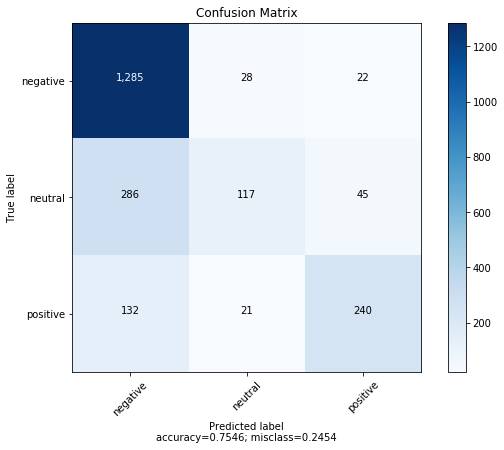

In [73]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#print(metrics.classification_report(Y_true, y_pred, digits=3))
target_names = ['negative', 'neutral', 'positive']
plot_confusion_matrix(cm           = confusion_matrix(y_test, nb_gs.best_estimator_.predict(X_test)), 
                      normalize    = False,
                      target_names = target_names,
                      title        = "Confusion Matrix")
#print(classification_report(nb_gs.best_estimator_.predict(X_test), y_test))

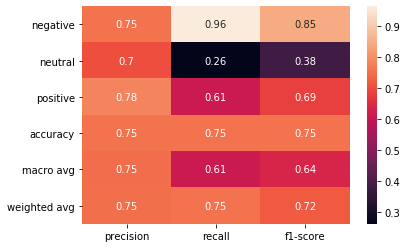

In [74]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd
clf_report = classification_report(y_test, nb_gs.best_estimator_.predict(X_test),
                                   target_names=target_names,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [76]:
# cross-validation for SVM Classifier
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")

features_count = features_union(tfidf)
svm_count_pipeline = Pipeline([('feats', features_count),  ('clf', LinearSVC())])
parameters = {
    'feats__text__tfidf__max_df': (0.5, 0.75, 1.0),
    'feats__text__tfidf__ngram_range': ((1, 1), (1, 2), (2, 2)), 
    'feats__text__tfidf__use_idf': (False, True),
    'clf__loss': ('hinge', 'squared_hinge'),
    'clf__C': (0.1, 0.5, 0.6, 1, 4, 5, 10, 100),
    'clf__class_weight': (None, 'balanced')                                    
}

svm_gs = GridSearchCV(svm_count_pipeline, parameters, cv=3)
svm_gs.fit(X_train, y_train)
svm_gs.score(X_test, y_test)


0.7890625

In [171]:
# cross-validation for SVM Classifier
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")

features_count = features_union(tfidf)
svm_count_pipeline = Pipeline([('feats', features_count),  ('clf', LinearSVC())])
parameters = {
    'feats__text__tfidf__max_df': (0.5, 0.75, 1.0),
    'feats__text__tfidf__ngram_range': ((1, 1), (1, 2), (2, 2)), 
    'feats__text__tfidf__use_idf': (False, True),
    'clf__loss': ('hinge', 'squared_hinge'),
    ##'clf__C': (10, 100, 500, 1000), - Best Param 10 - 0.7748161764705882
    ##'clf__C': (1, 5, 10), - Best Param 1 - 0.7817095588235294
    'clf__C': (0.1, 0.5,0.6, 1), ## --Best Param 0.5 - 0.7890625
    'clf__class_weight': (None, 'balanced')                                    
}

svm_gs = GridSearchCV(svm_count_pipeline, parameters, cv=3)
svm_gs.fit(X_train, y_train)
svm_gs.score(X_test, y_test)

0.7890625

In [174]:
print('Best params: {}'.format(svm_gs.best_params_))
svm_gs_results = pd.DataFrame(svm_gs.cv_results_)
svm_gs_results

Best params: {'clf__C': 0.5, 'clf__class_weight': 'balanced', 'clf__loss': 'squared_hinge', 'feats__text__tfidf__max_df': 0.5, 'feats__text__tfidf__ngram_range': (1, 2), 'feats__text__tfidf__use_idf': False}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__class_weight,param_clf__loss,param_feats__text__tfidf__max_df,param_feats__text__tfidf__ngram_range,param_feats__text__tfidf__use_idf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.066505,0.007020,0.025250,0.004029,0.1,None,hinge,0.5,"(1, 1)",False,"{'clf__C': 0.1, 'clf__class_weight': None, 'cl...",0.710993,0.725768,0.710402,0.715721,0.007109,172
1,0.069801,0.009396,0.023617,0.000935,0.1,None,hinge,0.5,"(1, 1)",True,"{'clf__C': 0.1, 'clf__class_weight': None, 'cl...",0.708038,0.721631,0.708038,0.712569,0.006408,196
2,0.130677,0.016891,0.038217,0.006180,0.1,None,hinge,0.5,"(1, 2)",False,"{'clf__C': 0.1, 'clf__class_weight': None, 'cl...",0.709811,0.722222,0.704492,0.712175,0.007429,199
3,0.154267,0.017171,0.034884,0.000826,0.1,None,hinge,0.5,"(1, 2)",True,"{'clf__C': 0.1, 'clf__class_weight': None, 'cl...",0.705674,0.716312,0.701537,0.707841,0.006224,214
4,0.263962,0.030474,0.030918,0.004309,0.1,None,hinge,0.5,"(2, 2)",False,"{'clf__C': 0.1, 'clf__class_weight': None, 'cl...",0.693853,0.703901,0.695626,0.697794,0.004379,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.134279,0.002598,0.029962,0.002149,1,balanced,squared_hinge,1,"(1, 1)",True,"{'clf__C': 1, 'clf__class_weight': 'balanced',...",0.725768,0.722813,0.731087,0.726556,0.003424,166
284,0.227421,0.013329,0.039604,0.001332,1,balanced,squared_hinge,1,"(1, 2)",False,"{'clf__C': 1, 'clf__class_weight': 'balanced',...",0.757092,0.751773,0.745863,0.751576,0.004586,55
285,0.226062,0.006534,0.039562,0.000503,1,balanced,squared_hinge,1,"(1, 2)",True,"{'clf__C': 1, 'clf__class_weight': 'balanced',...",0.755910,0.750591,0.740544,0.749015,0.006372,79
286,0.175189,0.012967,0.031245,0.000465,1,balanced,squared_hinge,1,"(2, 2)",False,"{'clf__C': 1, 'clf__class_weight': 'balanced',...",0.697400,0.707447,0.712175,0.705674,0.006161,226


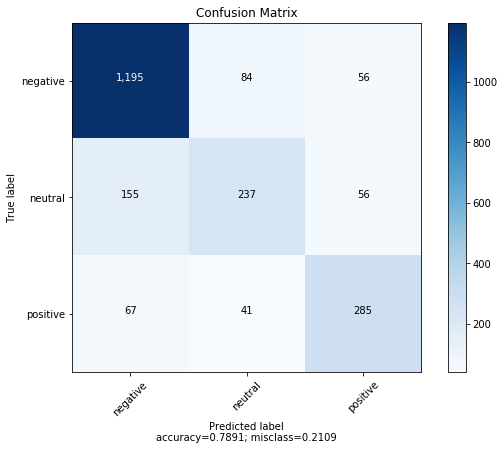

In [77]:
plot_confusion_matrix(cm           = confusion_matrix(y_test, svm_gs.best_estimator_.predict(X_test)), 
                      normalize    = False,
                      target_names = target_names,
                      title        = "Confusion Matrix")

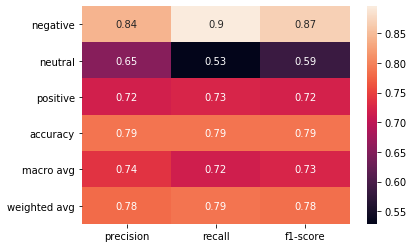

In [78]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd
clf_report = classification_report(y_test, svm_gs.best_estimator_.predict(X_test),
                                   target_names=target_names,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [75]:
print('Best params: {}'.format(nb_gs.best_params_))
nb_cv_results = pd.DataFrame(nb_gs.cv_results_)
nb_cv_results

Best params: {'clf__alpha': 1.0, 'clf__fit_prior': False, 'feats__text__tfidf__binary': None, 'feats__text__tfidf__max_df': 0.5, 'feats__text__tfidf__ngram_range': (1, 1), 'feats__text__tfidf__use_idf': True}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,param_clf__fit_prior,param_feats__text__tfidf__binary,param_feats__text__tfidf__max_df,param_feats__text__tfidf__ngram_range,param_feats__text__tfidf__use_idf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.144894,0.107616,0.040992,0.011952,1,True,l1,0.5,"(1, 1)",False,"{'clf__alpha': 1.0, 'clf__fit_prior': True, 'f...",0.676123,0.677305,0.683215,0.678881,0.003102,19
1,0.069812,0.002444,0.034921,0.005075,1,True,l1,0.5,"(1, 1)",True,"{'clf__alpha': 1.0, 'clf__fit_prior': True, 'f...",0.671986,0.675532,0.678487,0.675335,0.002658,31
2,0.150452,0.009764,0.052877,0.004908,1,True,l1,0.5,"(1, 2)",False,"{'clf__alpha': 1.0, 'clf__fit_prior': True, 'f...",0.639480,0.639480,0.643617,0.640859,0.001950,118


In [172]:
# cross-validation for RF Classifier
features_count = features_union(tfidf)
rf_pipeline_cv = Pipeline([('feats', features_count),  ('rf', RandomForestClassifier())])
parameters = {
    'feats__text__tfidf__max_df': (0.5, 1.0),
    'feats__text__tfidf__ngram_range': ((1, 1), (1, 2)),
    'rf__max_features': (0.5, 0.7, 1.0),
    'rf__bootstrap': (False ,True),
    'rf__class_weight': ('balanced', 'balanced_subsample', None),
    'rf__n_estimators':(10, 50, 80)
}

rf_gs = GridSearchCV(rf_pipeline_cv, parameters, cv=3)
rf_gs.fit(X_train, y_train)
rf_gs.score(X_test, y_test)

0.7449448529411765

In [173]:
print('Best params: {}'.format(rf_gs.best_params_))
nb_cv_results = pd.DataFrame(rf_gs.cv_results_)
nb_cv_results

Best params: {'feats__text__tfidf__max_df': 1.0, 'feats__text__tfidf__ngram_range': (1, 1), 'rf__bootstrap': True, 'rf__class_weight': None, 'rf__max_features': 0.7, 'rf__n_estimators': 50}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_feats__text__tfidf__max_df,param_feats__text__tfidf__ngram_range,param_rf__bootstrap,param_rf__class_weight,param_rf__max_features,param_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.149145,0.007518,0.027579,0.000948,0.5,"(1, 1)",False,balanced,0.5,10,"{'feats__text__tfidf__max_df': 0.5, 'feats__te...",0.734043,0.695626,0.685579,0.705083,0.020884,129
1,6.416247,0.232996,0.056160,0.002472,0.5,"(1, 1)",False,balanced,0.5,50,"{'feats__text__tfidf__max_df': 0.5, 'feats__te...",0.731087,0.702719,0.687943,0.707250,0.017903,124
2,10.843964,1.082747,0.082141,0.016072,0.5,"(1, 1)",False,balanced,0.5,80,"{'feats__text__tfidf__max_df': 0.5, 'feats__te...",0.729905,0.703310,0.688534,0.707250,0.017118,124
3,3.004021,0.559617,0.044551,0.006630,0.5,"(1, 1)",False,balanced,0.7,10,"{'feats__text__tfidf__max_df': 0.5, 'feats__te...",0.718676,0.697991,0.676714,0.697794,0.017132,159
4,10.739135,0.273719,0.075466,0.022335,0.5,"(1, 1)",False,balanced,0.7,50,"{'feats__text__tfidf__max_df': 0.5, 'feats__te...",0.723995,0.683806,0.677896,0.695232,0.020481,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,14.929020,0.129476,0.062495,0.001229,1,"(1, 2)",True,None,0.7,50,"{'feats__text__tfidf__max_df': 1.0, 'feats__te...",0.735816,0.731678,0.710993,0.726162,0.010859,17
212,25.238627,0.897248,0.084798,0.008598,1,"(1, 2)",True,None,0.7,80,"{'feats__text__tfidf__max_df': 1.0, 'feats__te...",0.732270,0.737589,0.713357,0.727738,0.010398,9
213,4.936323,0.525645,0.049881,0.002168,1,"(1, 2)",True,None,1,10,"{'feats__text__tfidf__max_df': 1.0, 'feats__te...",0.726950,0.720449,0.694444,0.713948,0.014044,101
214,21.255924,0.508262,0.063152,0.004002,1,"(1, 2)",True,None,1,50,"{'feats__text__tfidf__max_df': 1.0, 'feats__te...",0.731678,0.718085,0.709220,0.719661,0.009236,65


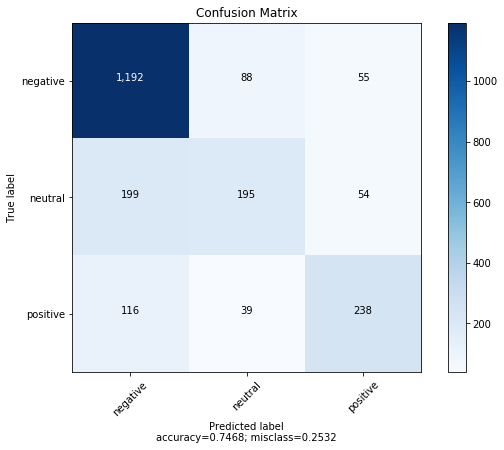

In [80]:
plot_confusion_matrix(cm           = confusion_matrix(y_test, rf_gs.best_estimator_.predict(X_test)), 
                      normalize    = False,
                      target_names = target_names,
                      title        = "Confusion Matrix")

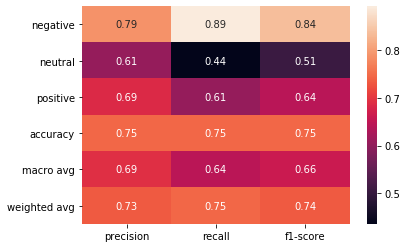

In [81]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd
clf_report = classification_report(y_test, rf_gs.best_estimator_.predict(X_test),
                                   target_names=target_names,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

### I will also give a try to simpletransformers ( Considering all the fuss around it) to check if it could give me some better results and if could be another candidte to optimize further

In [1]:
from simpletransformers.classification import ClassificationModel

Xmodel = ClassificationModel('roberta', 'roberta-base', num_labels=3, use_cuda = False)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [82]:
train_ST = pd.DataFrame (y_train, columns = ['labels'])
train_ST['text'] = X_train['text_stemming']
test_ST = pd.DataFrame (y_test, columns = ['labels'])
test_ST['text'] = X_test['text_stemming']

In [83]:
model.train_model(train_ST)

  0%|          | 0/5076 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/635 [00:00<?, ?it/s]

C:\Users\nisaurab\Anaconda3\lib\site-packages\torch\optim\lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


(635, 0.9566591525641013)

In [84]:
#Evaluating With F1 Score & Accuracy

from sklearn.metrics import f1_score, accuracy_score
def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')

In [86]:
scores2, model_outputs, wrong_predictions = model.eval_model(test_ST, f1=f1_multiclass, acc=accuracy_score)

  0%|          | 0/2176 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/272 [00:00<?, ?it/s]

C:\Users\nisaurab\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [87]:
scores2

{'mcc': 0.0,
 'f1': 0.6135110294117647,
 'acc': 0.6135110294117647,
 'eval_loss': 0.9346704106120503}

### With Above I will be ending my Model bulding step with below conclusions 

#### Best Model : LinearSVC
#### Best Score : 0.7890625
#### Best params: {'clf__C': 0.5, 'clf__class_weight': 'balanced', 'clf__loss': 'squared_hinge', 'feats__text__tfidf__max_df': 0.5, 'feats__text__tfidf__ngram_range':                                      (1, 2), 'feats__text__tfidf__use_idf': False}


## Future Work 

### With above conclusions I will end my model building process. We always have rooms for improvement, and I will always love if someone ( Or me in near future) may be able try few of below and check if we can make this model perform even better


#### Try Deep Learning models
#### Include more features like ( Geography/Time of Tweet etc)-
#### Feature engineering like np.log(X), np.exp(X), np.sqrt(X)